In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import minmax_scale
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [2]:
df = pd.read_csv("../data/autos_removed_target_mv.csv")

In [3]:
df.tail()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engin-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
159,95.0,volvo,gas,std,4.0,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,4,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
160,95.0,volvo,gas,turbo,4.0,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,4,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
161,95.0,volvo,gas,std,4.0,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,6,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
162,95.0,volvo,diesel,turbo,4.0,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,6,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
163,95.0,volvo,gas,turbo,4.0,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,4,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [4]:
# handling mv: drop
df = df.replace("?", np.nan)
df = df.dropna()

In [5]:
# divide X(features) and y(target)
y = df['normalized-losses']
X = df.ix[:, 1:]

In [6]:
# divide real & cat features in X
cols_real = list(X.describe().columns)
cols_cat = [col for col in X.columns if col not in cols_real]

X_real = X[cols_real]
X_cat = X[cols_cat]

In [7]:
# scaling X_real (minmax scale: 0~1)
X_scaled = minmax_scale(X_real)
dfX_scale = pd.DataFrame(X_scaled, columns=cols_real)

In [8]:
# dummies X_cat
X_dummies = pd.get_dummies(X_cat)

In [11]:
# reindex
dfX_scale.reset_index(drop=True, inplace=True)
X_dummies.reset_index(drop=True, inplace=True)

In [12]:
# concat preprocessed features
X_pre = pd.concat([dfX_scale, X_dummies], axis=1)

In [20]:
# ridge regression grid search
ridge_parmas = {'alpha': np.logspace(-2, 1, 100)}
ridge = Ridge()
model = GridSearchCV(ridge, ridge_parmas, scoring="neg_mean_squared_error")
model.fit(X_pre, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([ 0.01   ,  0.01072, ...,  9.32603, 10.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [25]:
model.cv_results_.keys()

dict_keys(['std_train_score', 'split0_train_score', 'std_test_score', 'split2_test_score', 'param_alpha', 'std_score_time', 'mean_score_time', 'std_fit_time', 'split1_test_score', 'rank_test_score', 'mean_fit_time', 'split0_test_score', 'params', 'split1_train_score', 'mean_train_score', 'mean_test_score', 'split2_train_score'])

In [46]:
# nmse -> rmse
rmse = (-model.cv_results_['mean_test_score'])**(1/2)

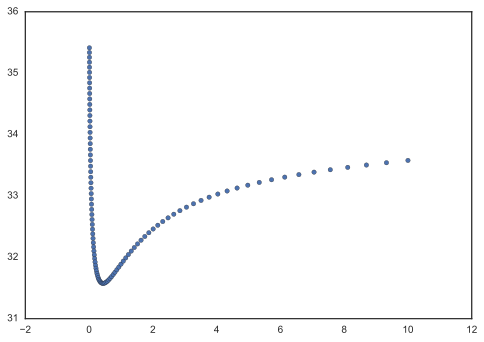

In [47]:
import matplotlib.pyplot as plt
plt.scatter(x=model.param_grid['alpha'], y=rmse)

In [49]:
# best param
print(model.best_params_, (-model.best_score_)**(1/2))

{'alpha': 0.43287612810830595} 31.574921779901498
